## Importing necessary libraries

In [2]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm


######################################
       Import Key Packages            
######################################


# Checking the Dataset overview

In [18]:
df =pd.read_excel("car_dataframe.xlsx")

In [19]:
df.head(5)

,Name,kilometer,Accidential,Owner,Fuel type,Transmission type,Manufacture year,Price
0,2014 Mahindra Thar CRDE 4X4 BS IV MANUAL,68595,Non-Accidental,1st Owner,Diesel,MANUAL,2014-06-01,522599
1,2009 Maruti Ritz VXI MANUAL,120301,Non-Accidental,1st Owner,Petrol,MANUAL,2009-12-01,190799
2,2014 Maruti Swift Dzire VDI BS IV MANUAL,98112,Non-Accidental,1st Owner,Diesel,MANUAL,2014-01-01,416399
3,2015 Maruti Swift VDI ABS MANUAL,45963,Non-Accidental,1st Owner,Diesel,MANUAL,2015-11-01,432499
4,2014 Maruti Swift Dzire LDI BS IV MANUAL,56863,Non-Accidental,1st Owner,Diesel,MANUAL,2014-08-01,338299


# Dataset Information

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5257 entries, 0 to 5256
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               5257 non-null   object        
 1   kilometer          5257 non-null   int64         
 2   Accidential        5257 non-null   object        
 3   Owner              5257 non-null   object        
 4   Fuel type          5257 non-null   object        
 5   Transmission type  5219 non-null   object        
 6   Manufacture year   5257 non-null   datetime64[ns]
 7   Price              5257 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 328.7+ KB


# Checking Null Values

In [21]:
#columns with null values
df.isnull().sum()

Name                  0
kilometer             0
Accidential           0
Owner                 0
Fuel type             0
Transmission type    38
Manufacture year      0
Price                 0
dtype: int64

In [22]:
df.dropna(inplace = True)

# Summary of Statistics

In [23]:
display(df.describe())

,kilometer,Price
count,5219.000000,5.219000e+03
mean,46658.209810,6.308008e+05
std,31284.046749,3.307308e+05
min,20.000000,1.907990e+05
25%,23758.500000,4.175990e+05
50%,41533.000000,5.396990e+05
75%,63903.000000,7.206490e+05
max,353288.000000,3.472299e+06


# Visualization of Data

In [24]:
import seaborn as sns

1st Owner    4123
2nd Owner    1000
3rd Owner      92
4th Owner       4
Name: Owner, dtype: int64


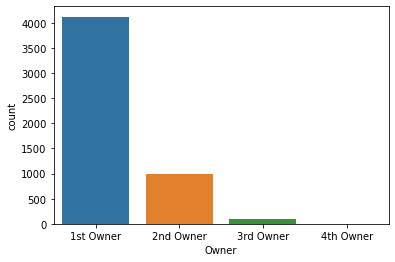

In [28]:
ax = sns.countplot(x="Owner",data=df)
print(df["Owner"].value_counts())

### Observation- 1st owner cars are most sold

MANUAL       4401
AUTOMATIC     818
Name: Transmission type, dtype: int64


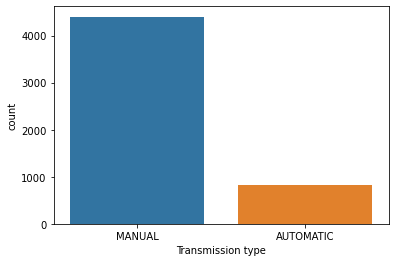

In [29]:
ax = sns.countplot(x="Transmission type",data=df)
print(df["Transmission type"].value_counts())

### Observation- Manual transmission cars are sold more than automatic once

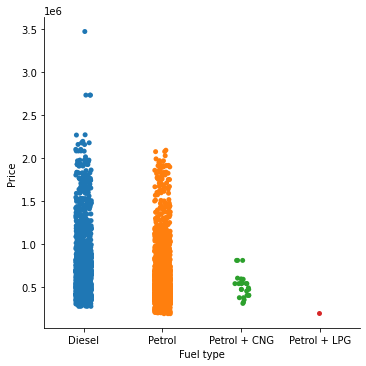

In [31]:
sns.catplot(x="Fuel type", y= "Price", data=df)

### Observation- Most of the cars are having Diesel or Petrol as fuel and least is having LPG

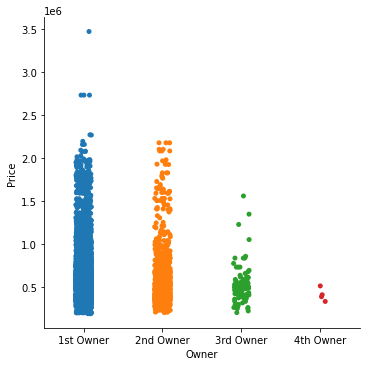

In [32]:
sns.catplot(x="Owner", y= "Price", data=df)

### Observation- The more the owner the least the car price is going 

## Lets see the heatmap of correlation

<AxesSubplot:>

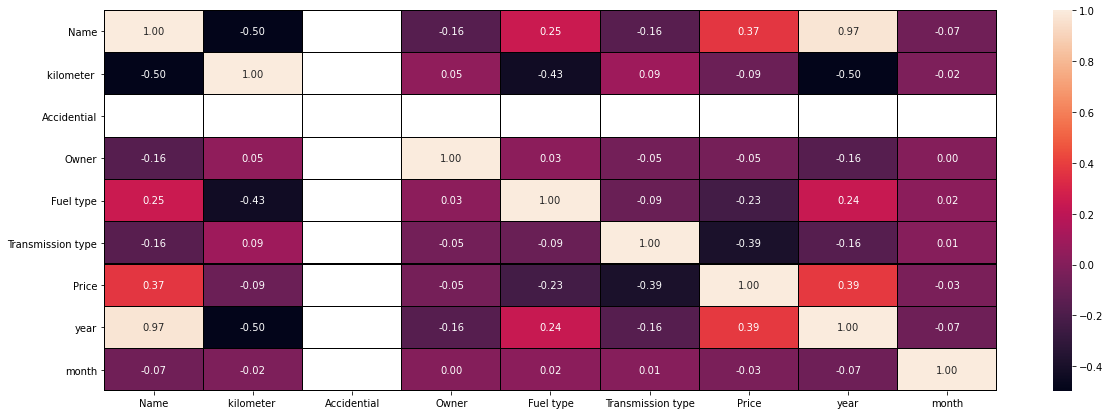

In [105]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot = True, linewidths = 0.1,linecolor="black",fmt= "0.2f")

# Label Encoder to convert the dataset to numerical

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [47]:
df.dtypes

Name                          int32
kilometer                     int64
Accidential                   int32
Owner                         int32
Fuel type                     int32
Transmission type             int32
Manufacture year     datetime64[ns]
Price                         int64
dtype: object

In [56]:
df['year'] = df['Manufacture year'].dt.year

In [58]:
df['month'] = df['Manufacture year'].dt.month

In [60]:
df = df.drop('Manufacture year', axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5219 entries, 0 to 5256
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Name               5219 non-null   int32
 1   kilometer          5219 non-null   int64
 2   Accidential        5219 non-null   int32
 3   Owner              5219 non-null   int32
 4   Fuel type          5219 non-null   int32
 5   Transmission type  5219 non-null   int32
 6   Price              5219 non-null   int64
 7   year               5219 non-null   int64
 8   month              5219 non-null   int64
dtypes: int32(5), int64(4)
memory usage: 434.8 KB


# Normal Distribution

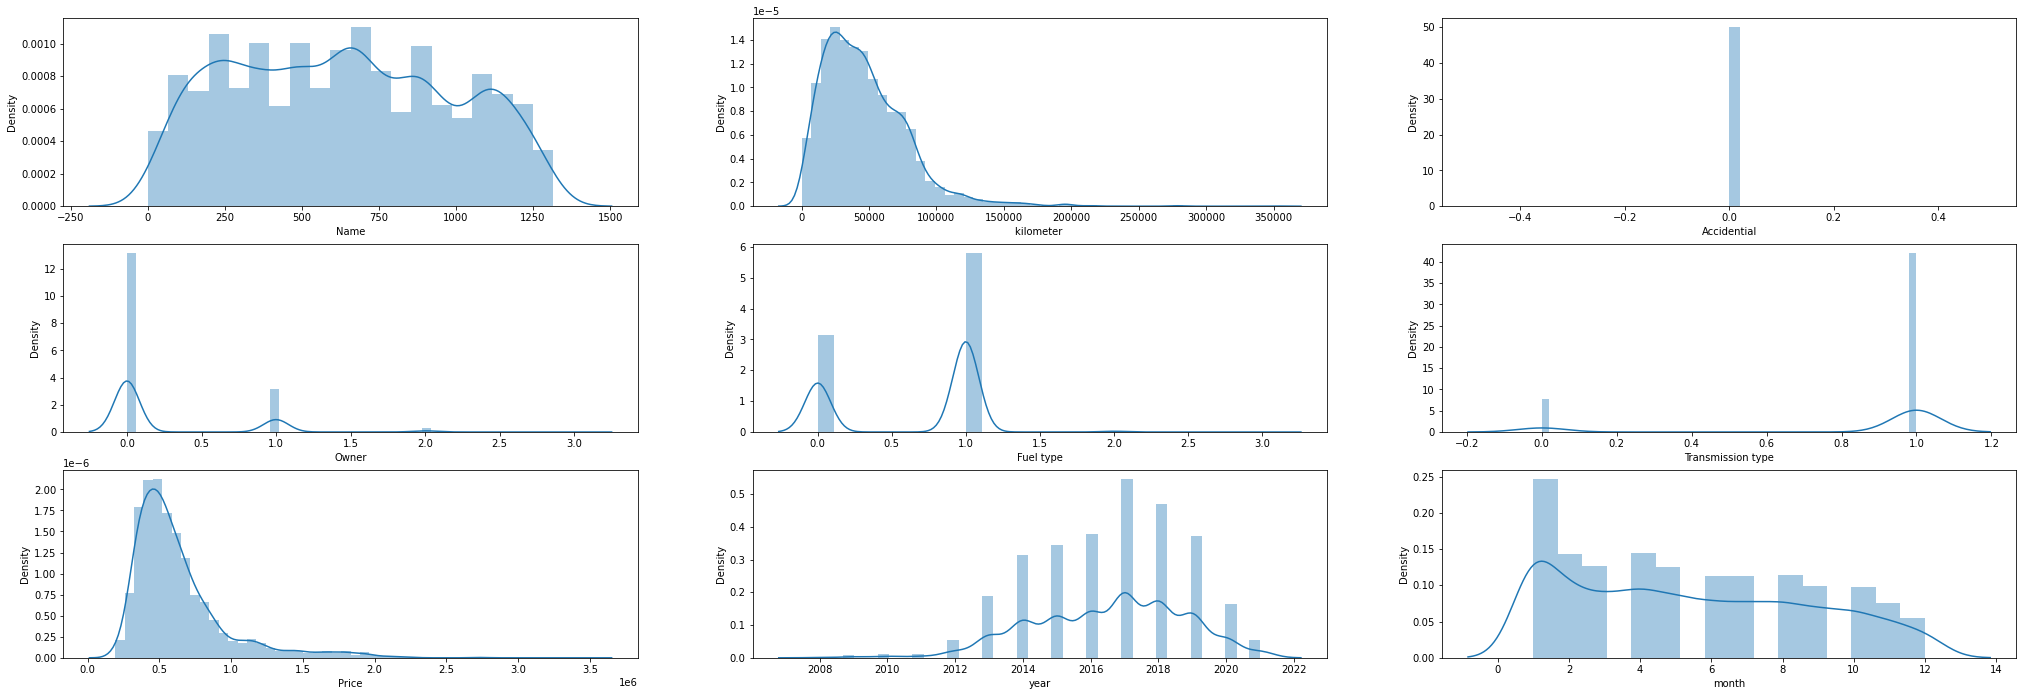

In [62]:
plt.figure(figsize=(35,45))
plotnumber =1

for column in df:
    if plotnumber <= 31:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column) 
    plotnumber+=1
plt.show()

# Lets Check the correlation 

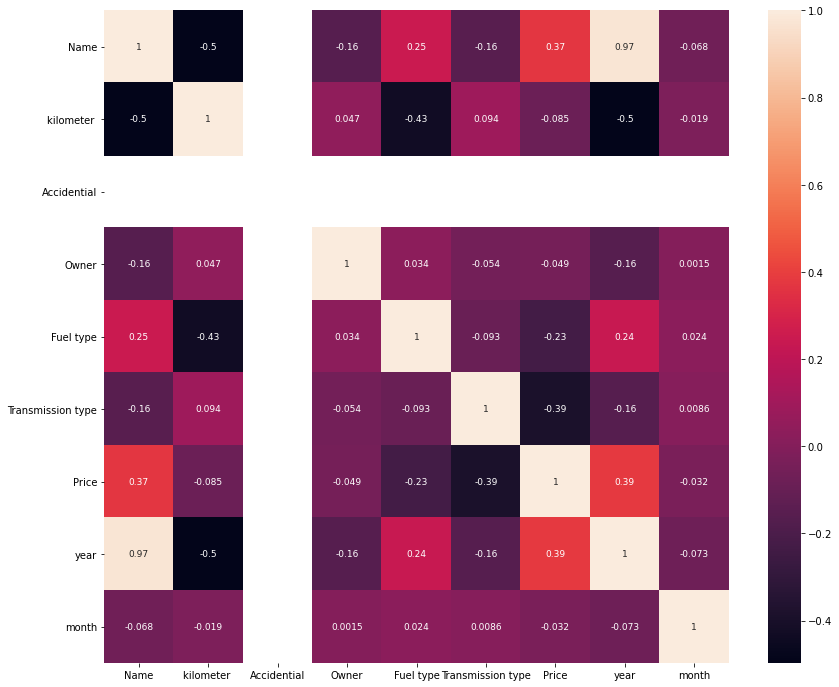

In [64]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True, annot_kws={"size": 9})
plt.show()

# Checking the Skewness

In [65]:
df.skew()

Name                 0.116953
kilometer            1.581443
Accidential          0.000000
Owner                1.910935
Fuel type           -0.496522
Transmission type   -1.888945
Price                2.119824
year                -0.367901
month                0.294255
dtype: float64

# Using Boxplot to check the outliers

Name                    AxesSubplot(0.125,0.749828;0.0945122x0.130172)
kilometer            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Accidential          AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Owner                AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Fuel type            AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Transmission type    AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Price                AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
year                    AxesSubplot(0.125,0.593621;0.0945122x0.130172)
month                AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
dtype: object

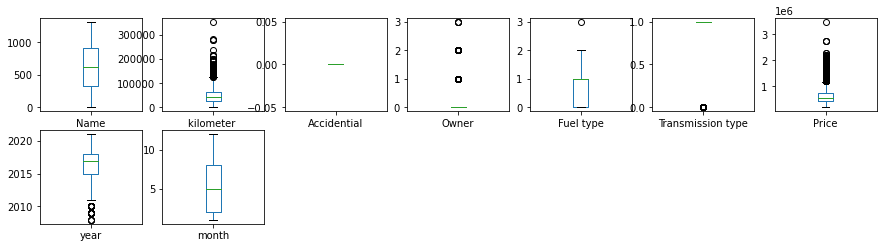

In [66]:
df.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

# Histogram to check the features distribution

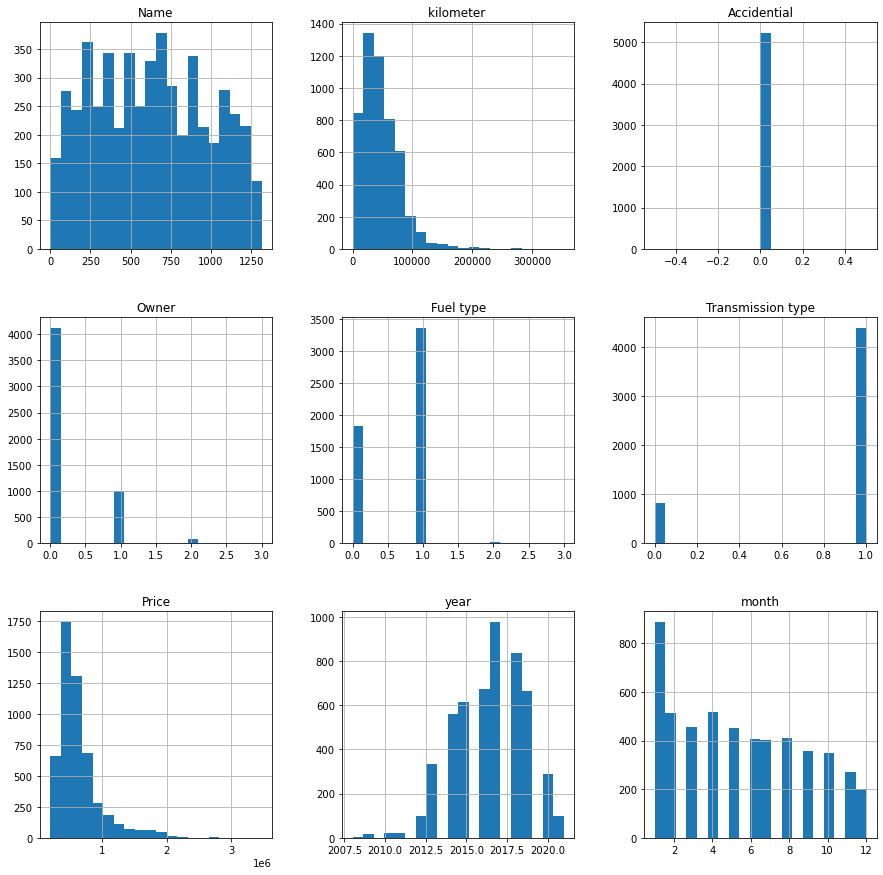

In [74]:
# Distributions of the variables/features.

df.hist(figsize=(15,15),bins=20)
plt.show()

# Applying ML Algorithms

In [80]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X1 = df.drop('Price', axis=1)
y1 = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.3, random_state=0)

# Linear Regression

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.3836
Test Score : 0.3818


# Ridge Regression

In [82]:
model = Ridge()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.3836
Test Score : 0.3818


# Gradient Boost

In [83]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.7404
Test Score : 0.6902


# K-Nearest Neighbors

In [84]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.6728
Test Score : 0.4554


# Random Forest

In [85]:
model = RandomForestRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9741
Test Score : 0.8257


# Decision Tree

In [86]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 1.0000
Test Score : 0.7536


# Hyperparameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

models = []
scores = []

### Ridge

In [89]:
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(ridge_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Ridge')
scores.append(ridge_score)

Test Score : 0.3822
Best Parameters : {'alpha': 10}
Best CV Score : 0.3785


### Gradient Boost

In [90]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.8324
Best Parameters : {'max_depth': 6}
Best CV Score : 0.8002


### K-Nearest Neighbors

In [91]:
param_grid = {'n_neighbors' : range(1, 20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
knr_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(knr_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('K-Nearest Neighbors')
scores.append(knr_score)

Test Score : 0.4800
Best Parameters : {'n_neighbors': 8}
Best CV Score : 0.5016


### Random Forest

In [92]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(rf_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Random Forest')
scores.append(rf_score)

Test Score : 0.8210
Best Parameters : {'max_depth': 30}
Best CV Score : 0.7916


### Decision Tree

In [93]:
am_grid = {'max_depth' : range(2, 20), "min_samples_leaf" : range(2, 10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(dt_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Decision Tree')
scores.append(dt_score)

Test Score : 0.7437
Best Parameters : {'max_depth': 30}
Best CV Score : 0.6606


### Result

In [94]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Ridge,0.382182
1,Gradient Boost,0.832425
2,K-Nearest Neighbors,0.479965
3,Random Forest,0.820987
4,Decision Tree,0.743735


### Observation- Gradient Boosting gave the highest accuracy so I will go with Random Forest Regressor to predict the amount of rainfall

In [100]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))


Test Score : 0.8324
Best Parameters : {'max_depth': 6}
Best CV Score : 0.7975


# Lets visualize the actual vs predicted result

In [101]:
predict = grid_search_final.predict(X_test)

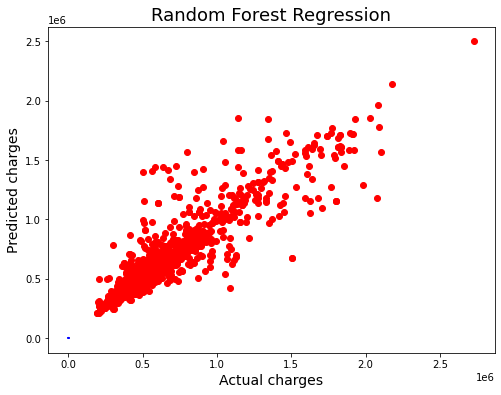

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predict,color='r')
plt.plot(X_test,X_test,color='b')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Random Forest Regression',fontsize= 18)
plt.show()

# Saving the Model

In [104]:
import pickle
filename = 'Car_price_prediction.pkl'
pickle.dump(grid_search_final,open(filename, 'wb'))